<a href="https://colab.research.google.com/github/asarria48/MSSF/blob/main/C3_MSF_RK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

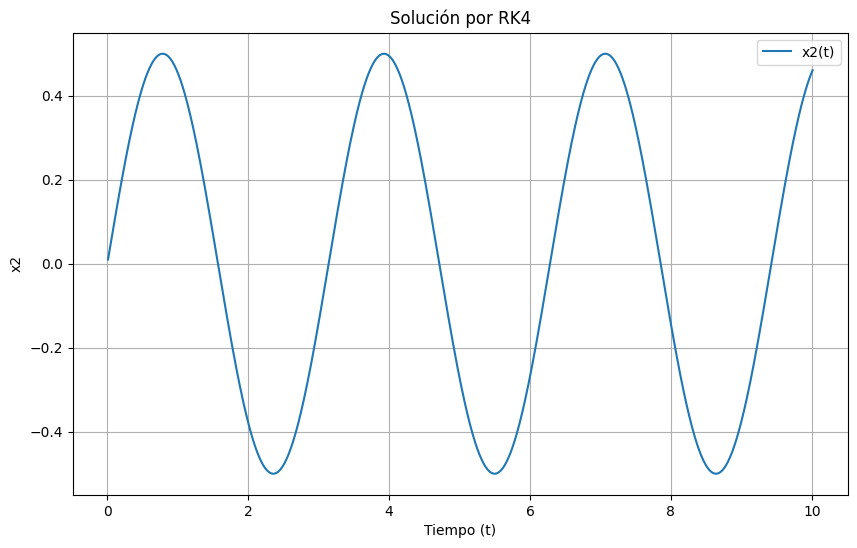

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T = np.pi
omega = 2*np.pi/T
omega2 = omega**2

def f1(t,x1,x2):
  return -omega2*x2;

def f2(t,x1,x2):
  return x1

def RK4step(t,x1,x2,dt):

  dx11 = dt*f1(t,x1,x2)
  dx12 = dt*f2(t,x1,x2)

  dx21 = dt*f1(t+ (dt/2), (x1 + dx11/2), x2+dx12/2)
  dx22 = dt*f2(t+ (dt/2), (x1 + dx11/2), x2+dx12/2)


  dx31 = dt*f1(t+(dt/2),x1+(dx21/2), x2+ (dx22/2))
  dx32 = dt*f2(t+(dt/2),x1+(dx21/2), x2+ (dx22/2))

  dx41 = dt*f1(t+dt,x1+dx31, x2+dx32)
  dx42 = dt*f2(t+dt,x1+dx31, x2+dx32)


  x1+=(dx11+2*(dx21+dx31)+dx41)/6.0
  x2+=(dx12+2*(dx22+dx32)+dx42)/6.0
  t+=dt

  return t, x1, x2

t = 0
x1 = 1
x2 = 0
dt = 0.01

data = "datos.dat"
with open(data, "w") as archivo:
    t, x1, x2 = 0, 1, 0
    dt = 0.01
    while t < 10:
        t, x1, x2 = RK4step(t, x1, x2, dt)
        archivo.write(f"{t} {x2}\n")

t = []
x2 = []
with open('datos.dat', 'r') as file:
    for line in file:
        parts = line.split()
        t.append(float(parts[0]))
        x2.append(float(parts[1]))

plt.figure(figsize=(10, 6))
plt.plot(t, x2, label='x2(t)')
plt.xlabel('Tiempo (t)')
plt.ylabel('x2')
plt.title('Solución por RK4')
plt.legend()
plt.grid(True)
plt.show()

